In [1]:
import pandas as pd


df_int_login = pd.read_csv("https://desafiogrupo1.s3.us-east-1.amazonaws.com/df1_alimentacion.csv")
df_ddos = pd.read_csv("https://desafiogrupo1.s3.us-east-1.amazonaws.com/df_alimentacion_DDOS.csv")
df_phishing = pd.read_csv("https://desafiogrupo1.s3.us-east-1.amazonaws.com/df_prueba_phising.csv")


In [4]:
df_phishing.shape, df_ddos.shape, df_int_login.shape

((100, 57), (106, 79), (120, 16))

C:\Users\Vicen\AppData\Local\Temp\ipykernel_3328\854477262.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


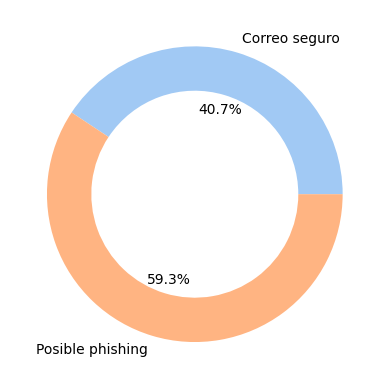

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import psycopg2

conn = psycopg2.connect(
    dbname="desafiogrupo1",
    user="desafiogrupo1_user",
    password="g7jS0htW8QqiGPRymmJw0IJgb04QO3Jy",
    host="dpg-d36i177fte5s73bgaisg-a.oregon-postgres.render.com",
    port="5432"
    )

cur = conn.cursor()
query = """
SELECT * FROM logs
    WHERE indicators IN ('Correo seguro', 'Posible phishing')
"""

df = pd.read_sql(query, conn)
df_group = df.groupby('indicators')['severity'].size().reset_index(name='total')


plt.pie(df_group['total'], labels=df_group['indicators'], colors=sns.color_palette("pastel"), wedgeprops=dict(width=0.3), autopct='%1.1f%%' )
plt.show()
conn.close()

In [4]:
from limpieza_datos2 import *

In [ ]:
for i in range(4):
    clean_data_phishing(df_phishing.iloc[i].to_dict())

In [3]:
for i in range(4):
    tres_en_uno(df_int_login.iloc[i].to_dict())

Conectando a PostgreSQL...
Conexión establecida.
Datos a insertar en logs: {'company_id': 1, 'type': 'Info', 'indicators': 'Login válido', 'severity': 0, 'date': datetime.date(2025, 2, 17), 'time': '10:25:40', 'actions_taken': 1}
ID generado en logs: 1259
Datos a insertar en login: {'log_id': 1259, 'login_timestamp': Timestamp('2020-02-17 10:25:40.854000'), 'user_id': 9084155980439359488, 'round_trip_time': None, 'ip_address': '51.174.133.75', 'country': 'NO', 'asn': 29695, 'user_agent': 'Mozilla/5.0  (iPad; CPU OS 7_1 like Mac OS X) AppleWebKit/533.1 (KHTML, like Gecko Version/4.0 Mobile Safari/533.1 variation/277457', 'country_code': 'NO', 'abuse_confidence_score': 0, 'last_reported_at': None, 'usage_type': 'Fixed Line ISP', 'domain': 'altibox.no', 'total_reports': 0}
ID generado en login: 32
:marca_de_verificación_blanca: Inserción completada correctamente.
Conectando a PostgreSQL...
Conexión establecida.
Datos a insertar en logs: {'company_id': 1, 'type': 'Alerta', 'indicators': 'A

In [5]:
import random
import time
import pandas as pd

def malware_type_detection(dict):
    if 'FILENAME' in dict.keys():
        clean_data_phishing(dict)
    elif 'Destination Port' in dict.keys():
        clean_data_ddos(dict)
    else:
        tres_en_uno(dict)
        

def procesamiento_datos():
    login_list =[]
    df_int_login = pd.read_csv("https://desafiogrupo1.s3.us-east-1.amazonaws.com/df1_alimentacion.csv")
    df_ddos = pd.read_csv("https://desafiogrupo1.s3.us-east-1.amazonaws.com/df_alimentacion_DDOS.csv")
    df_phishing = pd.read_csv("https://desafiogrupo1.s3.us-east-1.amazonaws.com/df_prueba_phising.csv")

    for i in range(df_int_login.shape[0]):
        login_list.append(df_int_login.iloc[i].to_dict())

    for i in range(df_ddos.shape[0]):
        login_list.append(df_ddos.iloc[i].to_dict())

    for i in range(df_phishing.shape[0]):
        login_list.append(df_phishing.iloc[i].to_dict())

    random.shuffle(login_list)

    for i in range(len(login_list)):
        malware_type_detection(login_list[i])
    return "Success"

In [3]:
procesamiento_datos()

Conectando a PostgreSQL...
Conexión establecida.
Datos a insertar en logs: {'company_id': 1, 'type': 'Alerta', 'indicators': 'Cuenta comprometida', 'severity': 2, 'date': datetime.date(2025, 2, 11), 'time': '04:11:54', 'actions_taken': 1}
ID generado en logs: 1331
Datos a insertar en login: {'log_id': 1331, 'login_timestamp': Timestamp('2020-02-11 04:11:54.075000'), 'user_id': -6836927275509080064, 'round_trip_time': None, 'ip_address': '1.180.62.41', 'country': 'US', 'asn': 393398, 'user_agent': 'Mozilla/5.0  (iPhone; CPU iPhone OS 11_2_6 like Mac OS X) AppleWebKit/537.36 (KHTML, like Gecko Chrome/81.0.4044.71 Mobile Safari/537.36,gzip(gfe,gzip(gfe variation/150870', 'country_code': 'CN', 'abuse_confidence_score': 100, 'last_reported_at': Timestamp('2025-09-25 08:30:02+0000', tz='UTC'), 'usage_type': 'Fixed Line ISP', 'domain': 'chinatelecom.cn', 'total_reports': 282}
ID generado en login: 104
:marca_de_verificación_blanca: Inserción completada correctamente.
Conectando a PostgreSQL..

KeyboardInterrupt: 